# Analysis of CDC pilot data

In [1]:
import pandas as pd
from ete3 import NCBITaxa
import os
import seaborn
import matplotlib.pyplot as plt
import math
import re
import numpy as np
from Bio import Entrez
import functions as func

## 0. Description of data

In [2]:
data_loc = pd.DataFrame(
    data = {'report_dir':["../../data/MOS002_reports", "../../data/CMS_reports"], 
            'sample_table_csv':["../../data/MOS002_sample-table.csv", "../../data/project-mosquito_sample-table.csv"],
            'study':["CDC pilot", "CMS"]
           })

In [3]:
idseq_data_list = data_loc.apply(lambda x: func.read_concat_csv(x[0], x[1], x[2]), axis=1).tolist()
idseq_data_list[0] = func.add_cdc_metadata (idseq_data_list[0], "../../data/181017_MOS002_CDCpilot_MetaDataSummary.csv")
idseq_data_list[1] = func.add_extra_info (idseq_data_list[1], "../../data/sample_genus_and_species.csv")
idseq_data = pd.concat(idseq_data_list)

In [4]:
print("Total CDC samples "+str(len(idseq_data_list[0].sample_name.unique())))
print(idseq_data_list[0].groupby("sample_name").first().location.value_counts())

Total CDC samples 61
wild-caught    31
lab            29
Name: location, dtype: int64


## 1. Blood meal detection

In [5]:
bloodmeal_calls = idseq_data.groupby("sample_name").apply(func.infer_bloodmeal)

In [6]:
bloodmeal_calls[["MOS" in x[0] for x in list(bloodmeal_calls.index)]]

,,tax_id,name,common_name,bloodfed_idseq,bloodfed_label,location
sample_name,,,,,,,
MOS002-01a-hom-R1,66123,8842,Anser,geese,True,True,lab
MOS002-02a-hom-R1,63962,8842,Anser,geese,True,True,lab
MOS002-03a-hom-R1,18177,8842,Anser,geese,True,True,lab
MOS002-04a-hom-R1,46692,8842,Anser,geese,True,True,lab
MOS002-05a-hom-R1,19788,8842,Anser,geese,True,True,lab
MOS002-06a-W-R1,7744,8842,Anser,geese,True,True,lab
MOS002-07a-W-R1,20674,8842,Anser,geese,True,True,lab
MOS002-08a-W-R1,35062,8842,Anser,geese,True,True,lab
MOS002-09a-W-R1,15150,8842,Anser,geese,True,True,lab


In [7]:
bloodmeal_calls.to_csv("../../data/bloodmeal_calls.csv", header=True, index=True)

## 2. Comparison of singleton mosquito vs homogenate analysis

In [8]:
idseq_data_list[0][(idseq_data_list[0].tax_level==1)&(idseq_data_list[0].sample_type!="water")]\
.sort_values(["NT_r"], ascending=False)\
.groupby("sample_name").apply(lambda x: x.head(5))\
.replace({'sample_type':{'aliquot of whole insect homogenate':'homogenate', 'homegenate':'homogenate'}})\
.groupby("sample_type").apply(lambda x: x["category_name"].value_counts())

sample_type           
homogenate   Bacteria     82
             Eukaryota    64
             Viruses       4
whole        Eukaryota    81
             Bacteria     67
             Viruses       2
Name: category_name, dtype: int64

## 3. Comparison with CMS studies

In [9]:
prop_reads_df = func.calc_prop_reads(idseq_data)

In [10]:
prop_reads_df.to_csv("../../data/proportion_reads_kingdoms.csv")

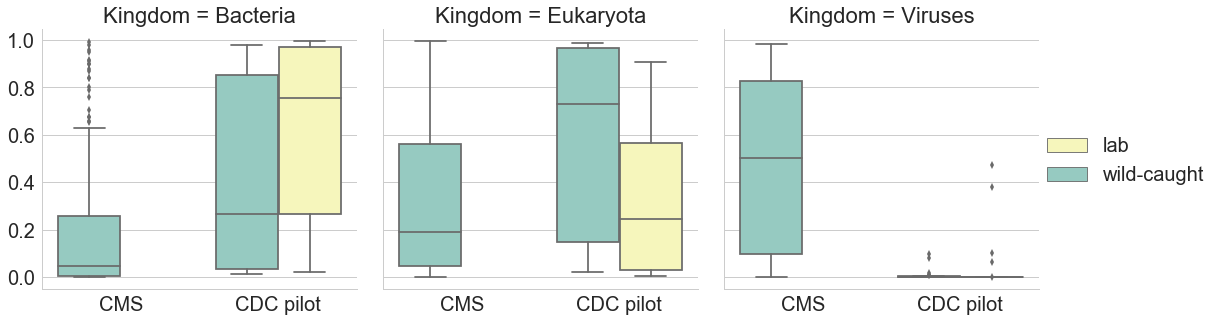

In [103]:
prop_reads_plot_df = pd.melt(prop_reads_df, id_vars=['sample_name', 'location', 'sample_type', 'study'],
                             value_vars=['Archaea', 'Bacteria', 'Eukaryota', 'Viruses', 'Uncategorized'], 
                             var_name='Kingdom', value_name='Proportion of reads')
prop_reads_plot_df = prop_reads_plot_df[(~prop_reads_plot_df.sample_name.str.contains('ater')) & (prop_reads_plot_df.Kingdom!="Uncategorized")]
prop_reads_plot_df = prop_reads_plot_df[prop_reads_plot_df.Kingdom!="Archaea"]
g = seaborn.FacetGrid(prop_reads_plot_df, col="Kingdom", col_wrap=3, size=5, aspect=1)
g = g.map_dataframe(seaborn.boxplot, x="study", y="Proportion of reads", hue="location", orient="v",
               palette="Set3").add_legend()

## 4. Viral diversity in CMS samples

In [12]:
viral_diversity_df = func.calc_viral_diversity(idseq_data, log=True)

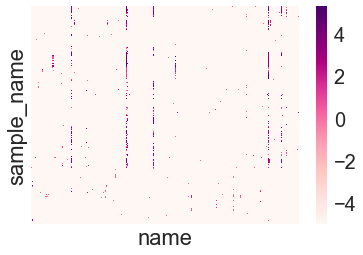

In [41]:
plot_heatmap(viral_diversity_df, xticklabels=False, yticklabels=False)

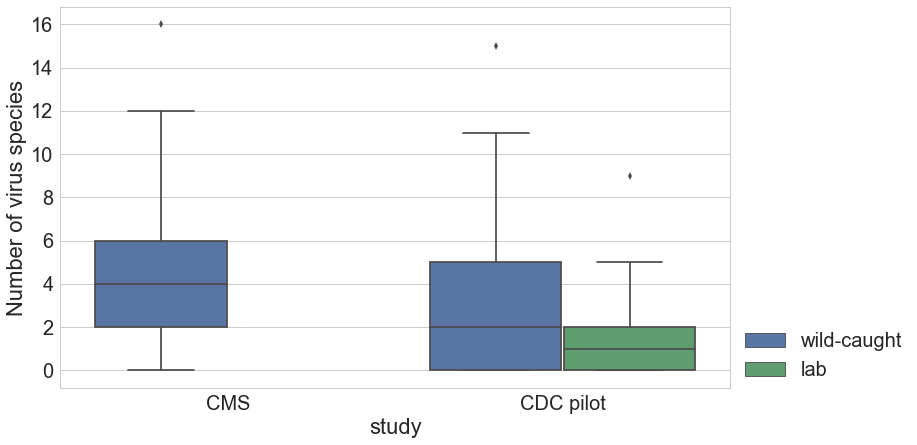

In [105]:
num_viral_species_df = pd.merge(viral_diversity_df.apply(lambda x: (x>-4.9).sum(), axis=1)\
                                .to_frame(name="Number of virus species"), idseq_data[["sample_name", "study", "location"]]\
                                .groupby("sample_name").first().reset_index(), 
                                how="left", left_index=True, right_on="sample_name")\
[["sample_name", "study", "location", "Number of virus species"]]

fig, ax = plt.subplots(figsize=(12, 7))
seaborn.boxplot(ax=ax, x="study", y="Number of virus species", hue="location", orient="v", data=num_viral_species_df)
ax.legend(loc='lower left', bbox_to_anchor= (1.01, 0.00), ncol=1, 
            borderaxespad=0, frameon=False)


In [71]:
num_viral_species_df.sort_values(by="Number of virus species").groupby("study").tail(10).sort_values(by="sample_name")

,sample_name,study,location,Number of virus species
0,CMS-076_RNA_A_S12,CMS,wild-caught,12
3,CMS-080_RNA_A_S7,CMS,wild-caught,11
4,CMS-081_RNA_A_S8,CMS,wild-caught,11
7,CMS-086_RNA_A_S11,CMS,wild-caught,11
62,CMS_002_38a_Rb_S172_L004,CMS,wild-caught,10
95,CMS_002_53a_Rb_S7_L004,CMS,wild-caught,16
112,CMS_006_RNA_A_S1,CMS,wild-caught,11
169,CMS_088b_Dynabeads_RNA_A_S6,CMS,wild-caught,10
174,CMS_D_RNA_A_S1,CMS,wild-caught,10
178,CMS_water3_Qiagen_S26,CMS,wild-caught,12


In [27]:
Entrez.email = "lucy.li@czbiohub.org"
ncbi = NCBITaxa()
virus_search_results = [Entrez.read(Entrez.esearch(db="Taxonomy", term=x, retmode="xml")) for x in viral_diversity_df.columns]
# virus_family_id = [ncbi.get_lineage(str(Entrez.read(Entrez.esearch(db="Taxonomy", term=x, retmode="xml"))['IdList'][0]))[-3] \
#                    for x in viral_diversity_df.columns]


In [28]:
virus_search_results

[DictElement({'Count': '1', 'RetMax': '1', 'RetStart': '0', 'IdList': ['1913571'], 'TranslationSet': [], 'TranslationStack': [DictElement({'Term': 'Acinetobacter phage AM24[All Names]', 'Field': 'All Names', 'Count': '1', 'Explode': 'N'}, attributes={}), 'GROUP'], 'QueryTranslation': 'Acinetobacter phage AM24[All Names]'}, attributes={}),
 DictElement({'Count': '1', 'RetMax': '1', 'RetStart': '0', 'IdList': ['1560342'], 'TranslationSet': [], 'TranslationStack': [DictElement({'Term': 'Acinetobacter phage YMC13/03/R2096[All Names]', 'Field': 'All Names', 'Count': '1', 'Explode': 'N'}, attributes={}), 'GROUP'], 'QueryTranslation': 'Acinetobacter phage YMC13/03/R2096[All Names]'}, attributes={}),
 DictElement({'Count': '1', 'RetMax': '1', 'RetStart': '0', 'IdList': ['1930920'], 'TranslationSet': [], 'TranslationStack': [DictElement({'Term': 'Adelphocoris suturalis virus[All Names]', 'Field': 'All Names', 'Count': '1', 'Explode': 'N'}, attributes={}), 'GROUP'], 'QueryTranslation': 'Adelphoc

In [33]:
idseq_data[idseq_data.name.str.contains("Wolbachia").fillna(False)]

,sample_name,tax_id,name,common_name,tax_level,species_taxid,genus_taxid,family_taxid,category_name,is_phage,...,nucleotide_type,location,host_genome,notes,sample_diagnosis,study,sample_type,mosquito_species,n_mosquito,bloodfed_label
0,MOS002-12a-W-R1,953,Wolbachia,NaN,2,-100,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
1,MOS002-12a-W-R1,263437,Wolbachia endosymbiont of Culex quinquefasciatus,NaN,1,263437,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
2,MOS002-12a-W-R1,-100000953,Non-species-specific reads in genus Wolbachia,NaN,1,-100000953,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
3,MOS002-12a-W-R1,307502,Wolbachia endosymbiont of Drosophila ananassae,NaN,1,307502,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
4,MOS002-12a-W-R1,329647,Wolbachia endosymbiont of Culex molestus,NaN,1,329647,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
5,MOS002-12a-W-R1,169402,Wolbachia endosymbiont of Folsomia candida,NaN,1,169402,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
6,MOS002-12a-W-R1,955,Wolbachia pipientis,NaN,1,955,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
7,MOS002-12a-W-R1,246273,Wolbachia endosymbiont of Cimex lectularius,NaN,1,246273,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
8,MOS002-12a-W-R1,80849,Wolbachia endosymbiont of Brugia malayi,NaN,1,80849,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
9,MOS002-12a-W-R1,77038,Wolbachia endosymbiont of Drosophila simulans,NaN,1,77038,953,942,Bacteria,0,...,RNA,lab,Mosquito,- id_method : freeze\n- genus_species: Culex q...,NaN,CDC pilot,whole,Culex quinquefasciatus,11.0,False
